<a href="https://colab.research.google.com/github/rudxkush/Machine-Learning/blob/main/Univariate%2C_Bivariate_and_Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn import datasets

In [2]:
data1 = """height,weight,output
150,45,slim
152,47,slim
155,48,slim
158,50,slim
160,52,slim
162,54,slim
165,55,slim
168,57,slim
170,58,slim
172,60,slim
150,55,fit
152,58,fit
155,60,fit
158,62,fit
160,64,fit
162,66,fit
165,68,fit
168,70,fit
170,72,fit
172,74,fit
150,70,obese
152,73,obese
155,76,obese
158,80,obese
160,83,obese
162,86,obese
165,90,obese
168,94,obese
170,98,obese
172,102,obese
"""

In [3]:
# StringIO is telling python to treat this string like a file/stream
df1 = pd.read_csv(StringIO(data1))

In [4]:
df1.head()

,height,weight,output
0,150,45,slim
1,152,47,slim
2,155,48,slim
3,158,50,slim
4,160,52,slim


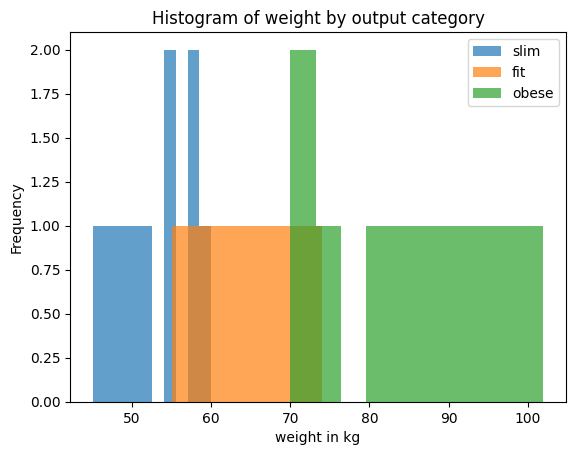

In [5]:
categories = df1['output'].unique()
for category in categories:
    plt.hist(df1[df1['output'] == category]['weight'], label=category, alpha=0.7)

plt.legend()
plt.xlabel('weight in kg')
plt.ylabel('Frequency')
plt.title('Histogram of weight by output category')
plt.show()

This univariate analysis visualizes the distribution of weight
for each output category. Overlap between histograms indicates
similarity in weight ranges across classes.

/tmp/ipython-input-183/265818464.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


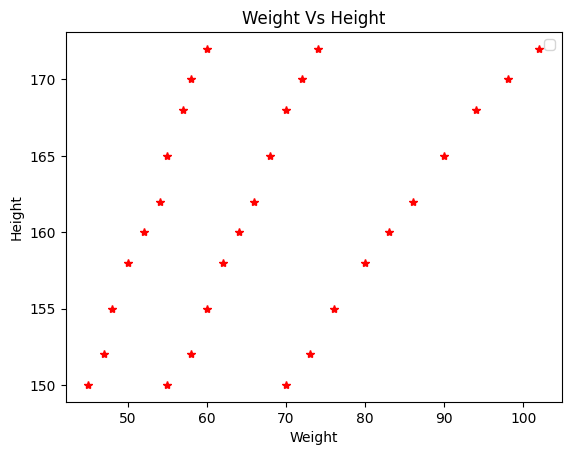

In [6]:
plt.plot(df1['weight'], df1['height'], 'r*')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight Vs Height')
plt.show()

In [7]:
df1.select_dtypes(include='number').corr()

,height,weight
height,1.000000,0.453482
weight,0.453482,1.000000


<Axes: >

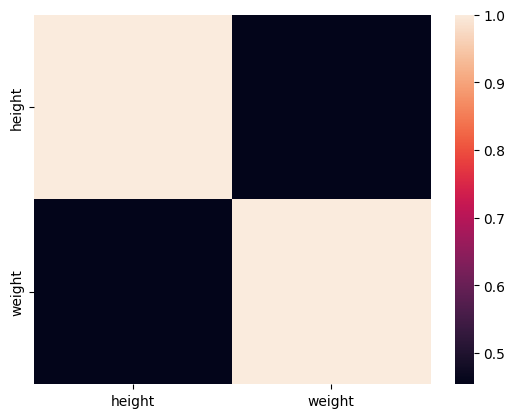

In [8]:
sns.heatmap(df1.select_dtypes(include=['number']).corr())

In [9]:
data2 = """height_cm,weight_kg,age,output
150,45,19,slim
152,47,21,slim
155,48,22,slim
158,50,23,slim
160,52,24,slim
162,54,25,slim
165,55,26,slim
168,57,27,slim
170,58,28,slim
172,60,29,slim
150,55,23,fit
152,58,25,fit
155,60,27,fit
158,62,29,fit
160,64,31,fit
162,66,33,fit
165,68,35,fit
168,70,37,fit
170,72,39,fit
172,74,41,fit
150,70,32,obese
152,73,34,obese
155,76,36,obese
158,80,38,obese
160,83,40,obese
162,86,42,obese
165,90,44,obese
168,94,46,obese
170,98,48,obese
172,102,50,obese
"""

In [10]:
df2 = pd.read_csv(StringIO(data2))

In [11]:
df2.head()

,height_cm,weight_kg,age,output
0,150,45,19,slim
1,152,47,21,slim
2,155,48,22,slim
3,158,50,23,slim
4,160,52,24,slim


In [12]:
df2.select_dtypes(include='number').corr()

,height_cm,weight_kg,age
height_cm,1.000000,0.453482,0.573158
weight_kg,0.453482,1.000000,0.978889
age,0.573158,0.978889,1.000000


<Axes: >

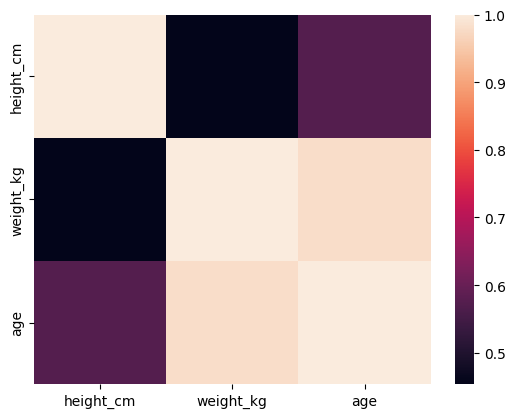

In [13]:
sns.heatmap(df2.select_dtypes(include=['number']).corr())

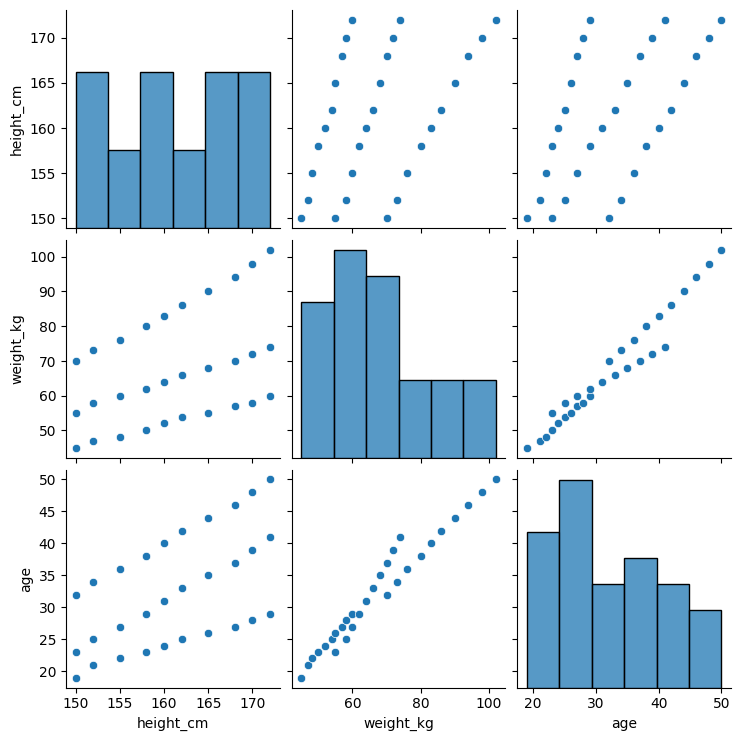

In [14]:
sns.pairplot(data=df2)

In [15]:
iris = datasets.load_iris()

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.shape

(150, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Univariate Analysis

In [21]:
# 0 → Setosa
# 1 → Versicolor
# 2 → Virginica
df_setosa = df.loc[df['species'] == 0]
df_versicolor = df.loc[df['species'] == 1]
df_virginica = df.loc[df['species'] == 2]

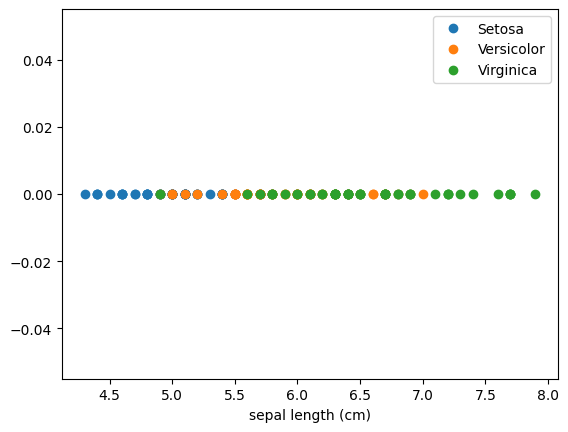

In [22]:
plt.plot(df_setosa['sepal length (cm)'], np.zeros_like(df_setosa['sepal length (cm)']),'o')
plt.plot(df_versicolor['sepal length (cm)'], np.zeros_like(df_versicolor['sepal length (cm)']),'o')
plt.plot(df_virginica['sepal length (cm)'], np.zeros_like(df_virginica['sepal length (cm)']),'o')
plt.xlabel('sepal length (cm)')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

## Bivariate Analysis

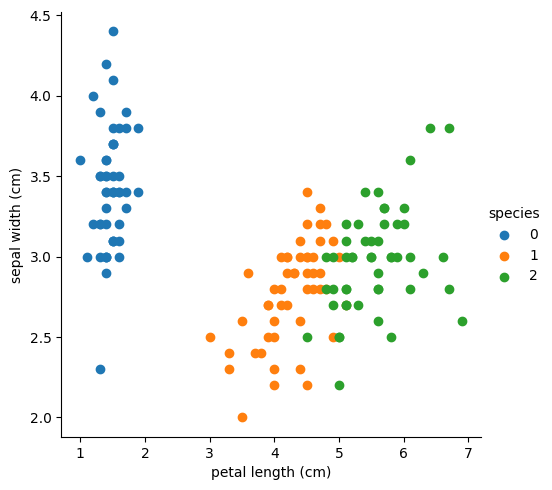

In [35]:
sns.FacetGrid(df, hue='species', height=5).map(plt.scatter, 'petal length (cm)', 'sepal width (cm)').add_legend()

## Multivariate Analysis

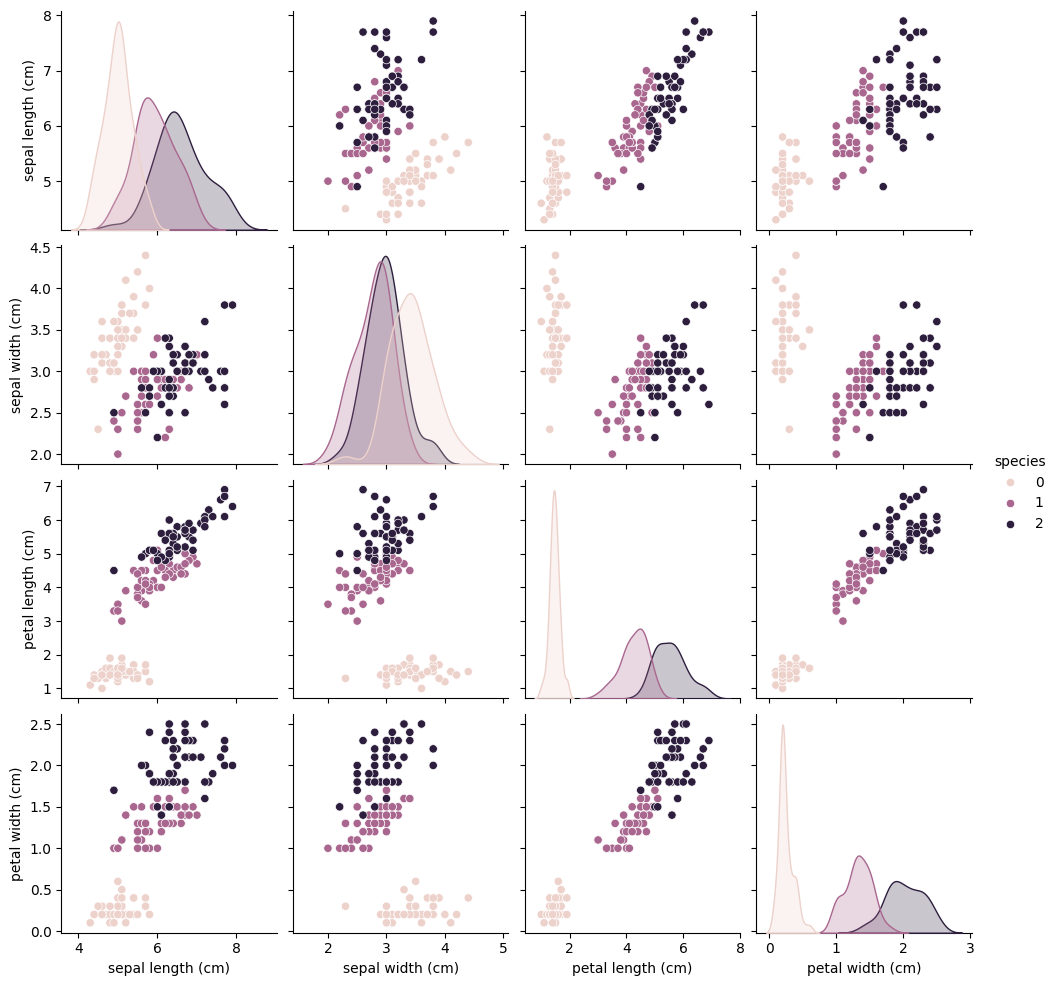

In [25]:
sns.pairplot(data=df, hue='species')

## Pearson Correlation

In [23]:
df.select_dtypes(include=['number']).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

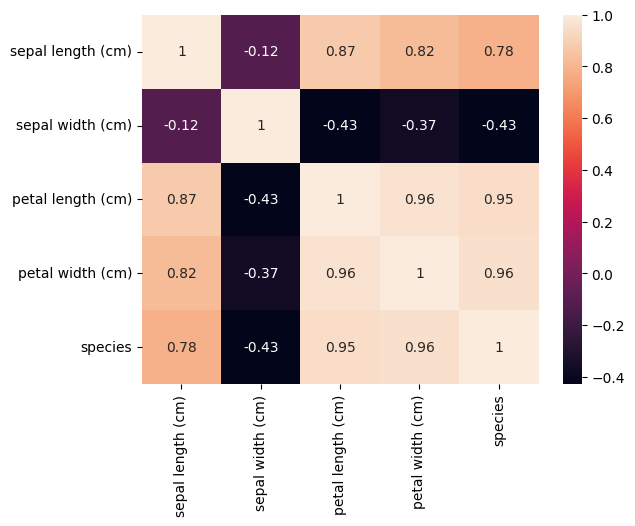

In [24]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)